# Generating non-trivial 2D domains

The domain of a function in a variational problem/differential equation/fitting problem might not be a simple product of integrals (a `box` in `elvet`'s terms). Here are some examples of generating them.

In [1]:
import matplotlib.pyplot as plt

import elvet

## A box

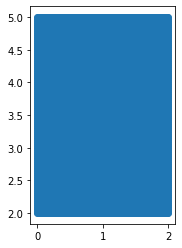

In [3]:
domain = elvet.box((0, 2, 100), (2, 5, 100))

_, ax = plt.subplots(1)
ax.scatter(*domain.numpy().T)
ax.set_aspect(1)

## A more complex polygon

Defined by the linear equations
$$
    x_0 + x_1 > 4, \qquad x_0 - x_1 < 3/2, \qquad x_0 - 2 x_1 > -9.
$$

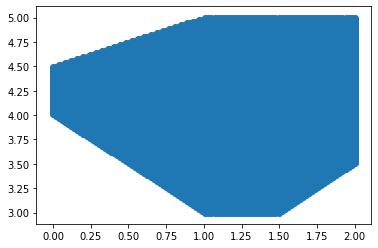

In [7]:
def conditions(x):
    return (
        x[0] + x[1] > 4,
        x[0] - x[1] < -1.5,
        x[0] - 2 * x[1] > -9,
    )

domain = elvet.cut_domain(elvet.box((0, 2, 100), (3, 5, 100)), conditions)
plt.scatter(*domain.numpy().T)

## An ellipsoid

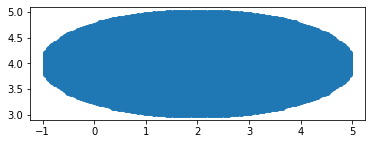

In [9]:
domain = elvet.ellipsoid((2, 4), (3, 1), n_points=10000)

_, ax = plt.subplots(1)
ax.scatter(*domain.numpy().T)
ax.set_aspect(1)

## A more complex region

Determined by the non-linear equations
$$
    y > x^2, \qquad y < x.
$$

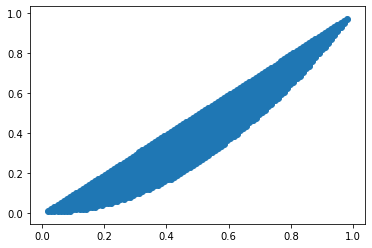

In [11]:
def conditions(xy):
    x, y = xy
    return y > x**2, y < x

domain = elvet.cut_domain(elvet.box((0, 1, 100), (0, 1, 100)), conditions)
plt.scatter(*domain.numpy().T)